In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/MyDrive/')


['Getting started.pdf',
 'IMG_20181227_220323.jpg',
 'IMG_20210717_173206_165.jpg',
 'Ayesha',
 "Ayesha's stuffs  ss",
 'Me',
 'ChAt',
 'Recording',
 'Ayesha call',
 'JIGL MARATHON NOTES (1).pdf',
 'Colab Notebooks',
 'InteractiveSheet_2026-01-15_07_27_47.gsheet',
 'The Abrupt Crash of Silver by md hassan sher.docx',
 'Margin Trading, How Leveraged Funds Can Cause Small Losses to Turn into Big Losses by md hassan sher.docx',
 'Why Short-Term FOMO Trades Are Costing Retail Investors Big by MD HASSAN SHER.docx',
 'financial resume MD HASSAN SHER.pdf',
 'Brochure.gdoc',
 'MyDrive Primetrade_Assignment ']

In [ ]:
os.listdir('/content/drive/MyDrive/MyDrive Primetrade_Assignment /')

['fear_greed_index.csv', 'historical_data.csv']

In [ ]:
import pandas as pd

sentiment_path = "/content/drive/MyDrive/MyDrive Primetrade_Assignment /fear_greed_index.csv"
trades_path = "/content/drive/MyDrive/MyDrive Primetrade_Assignment /historical_data.csv"

sentiment = pd.read_csv(sentiment_path)
trades = pd.read_csv(trades_path)

print("Sentiment shape:", sentiment.shape)
print("Trades shape:", trades.shape)

sentiment.head()

Sentiment shape: (2644, 4)
Trades shape: (211224, 16)


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [ ]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [ ]:
print("----- SENTIMENT DATA -----")
print("Rows, Columns:", sentiment.shape)
print("\nColumns:\n", sentiment.columns)
print("\nMissing Values:\n", sentiment.isna().sum())
print("\nDuplicates:", sentiment.duplicated().sum())

print("\n\n----- TRADES DATA -----")
print("Rows, Columns:", trades.shape)
print("\nColumns:\n", trades.columns)
print("\nMissing Values:\n", trades.isna().sum())
print("\nDuplicates:", trades.duplicated().sum())


----- SENTIMENT DATA -----
Rows, Columns: (2644, 4)

Columns:
 Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

Missing Values:
 timestamp         0
value             0
classification    0
date              0
dtype: int64

Duplicates: 0


----- TRADES DATA -----
Rows, Columns: (211224, 16)

Columns:
 Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

Missing Values:
 Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Duplicates: 0


In [ ]:
# Check columns first
print(sentiment.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [ ]:
# Convert date column
sentiment['date'] = pd.to_datetime(sentiment['date'])

# Standardize sentiment labels
sentiment['classification'] = sentiment['classification'].str.strip()

# Convert Extreme categories to binary
sentiment['sentiment'] = sentiment['classification'].replace({
    'Extreme Fear': 'Fear',
    'Extreme Greed': 'Greed'
})

# Keep only required columns
sentiment = sentiment[['date', 'sentiment']]

sentiment.head()


,date,sentiment
0,2018-02-01,Fear
1,2018-02-02,Fear
2,2018-02-03,Fear
3,2018-02-04,Fear
4,2018-02-05,Fear


In [ ]:
print(trades.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [ ]:
print("Sentiment date range:", sentiment['date'].min(), "to", sentiment['date'].max())

trades['Timestamp'] = pd.to_datetime(trades['Timestamp'], unit='ms') # Assuming 'Timestamp' is in milliseconds
print("Trades date range:", trades['Timestamp'].min(), "to", trades['Timestamp'].max())

Sentiment date range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00
Trades date range: 2023-03-28 10:40:00 to 2025-06-15 15:06:40


In [ ]:
trades['date'] = pd.to_datetime(trades['Timestamp']).dt.date
sentiment['date'] = pd.to_datetime(sentiment['date']).dt.date

merged = trades.merge(
    sentiment,
    on='date',
    how='inner'
)

print("Before merge:", trades.shape)
print("After merge:", merged.shape)

Before merge: (211224, 17)
After merge: (184263, 18)


In [ ]:
daily_pnl = merged.groupby(['Account','date'])['Closed PnL'].sum().reset_index()
daily_pnl.head()


,Account,date,Closed PnL
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00


In [ ]:
merged['win'] = merged['Closed PnL'] > 0

daily_winrate = (
    merged.groupby(['Account','date'])['win']
    .mean()
    .reset_index()
    .rename(columns={'win':'win_rate'})
)

daily_winrate.head()


,Account,date,win_rate
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,0.025974
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,0.405542
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,0.531250
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,0.435041
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,0.000000


In [ ]:
daily_trades = (
    merged.groupby(['Account','date'])
    .size()
    .reset_index(name='num_trades')
)

daily_trades.head()


,Account,date,num_trades
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,462
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,3356
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,320
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,3533
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,5


In [ ]:
daily_avg_size = (
    merged.groupby(['Account','date'])['Size USD']
    .mean()
    .reset_index()
    .rename(columns={'Size USD':'avg_trade_size'})
)

daily_avg_size.head()


,Account,date,avg_trade_size
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,14810.891818
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,16345.241940
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2492.749906
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1693.351684
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,6070.200000


In [ ]:
daily_metrics = daily_pnl.merge(daily_winrate, on=['Account','date'])
daily_metrics = daily_metrics.merge(daily_trades, on=['Account','date'])
daily_metrics = daily_metrics.merge(daily_avg_size, on=['Account','date'])

# Add sentiment
daily_metrics = daily_metrics.merge(
    sentiment,
    on='date',
    how='left'
)

daily_metrics.head()


,Account,date,Closed PnL,win_rate,num_trades,avg_trade_size,sentiment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,2024-10-27,-3.275059e+05,0.025974,462,14810.891818,Greed
1,0x083384f897ee0f19899168e3b1bec365f52a9012,2025-02-19,1.927736e+06,0.405542,3356,16345.241940,Fear
2,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2024-10-27,2.060745e+04,0.531250,320,2492.749906,Greed
3,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,2025-02-19,1.709873e+04,0.435041,3533,1693.351684,Fear
4,0x271b280974205ca63b716753467d5a371de622ab,2024-07-03,-1.000000e+00,0.000000,5,6070.200000,Neutral


In [ ]:
daily_metrics.groupby('sentiment')['Closed PnL'].mean()


,Closed PnL
sentiment,
Fear,209372.662205
Greed,90988.703436
Neutral,19842.797260


In [ ]:
daily_metrics.groupby('sentiment')['win_rate'].mean()


,win_rate
sentiment,
Fear,0.415878
Greed,0.369012
Neutral,0.260683


In [ ]:
daily_metrics.groupby('sentiment')['num_trades'].mean()


,num_trades
sentiment,
Fear,4183.468750
Greed,1168.945946
Neutral,892.625000


In [ ]:
daily_metrics.groupby('sentiment')['avg_trade_size'].mean()


,avg_trade_size
sentiment,
Fear,5926.522723
Greed,5637.302441
Neutral,3793.444161


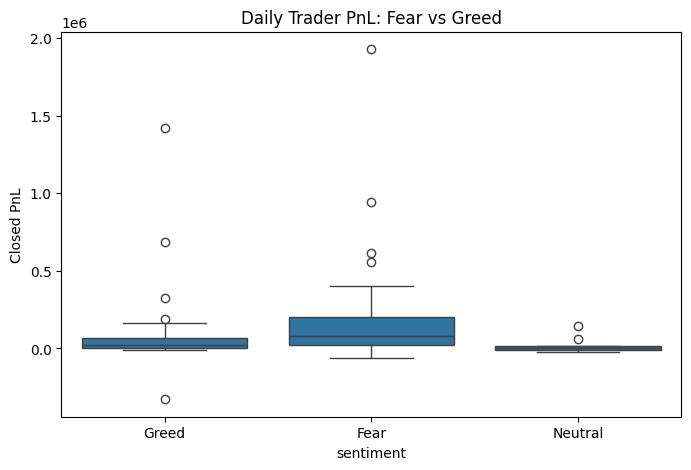

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=daily_metrics, x='sentiment', y='Closed PnL')
plt.title("Daily Trader PnL: Fear vs Greed")
plt.show()


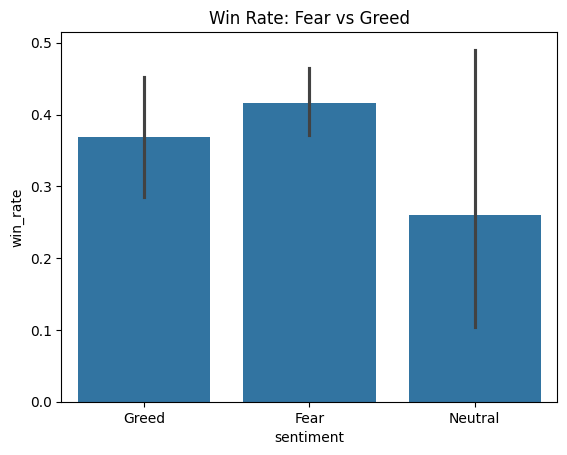

In [ ]:
sns.barplot(data=daily_metrics, x='sentiment', y='win_rate')
plt.title("Win Rate: Fear vs Greed")
plt.show()


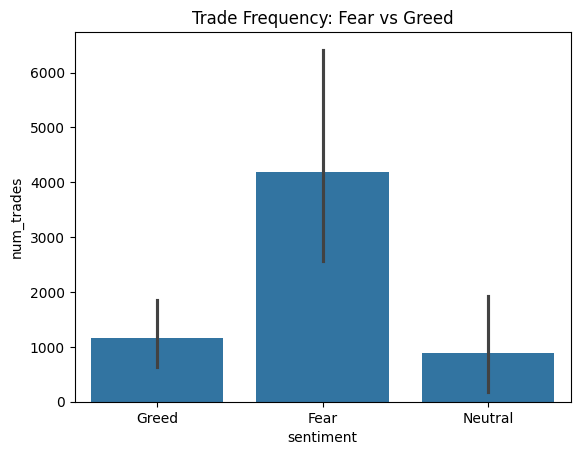

In [ ]:
sns.barplot(data=daily_metrics, x='sentiment', y='num_trades')
plt.title("Trade Frequency: Fear vs Greed")
plt.show()


In [ ]:
from scipy.stats import ttest_ind

fear = daily_metrics[daily_metrics['sentiment']=='Fear']['Closed PnL']
greed = daily_metrics[daily_metrics['sentiment']=='Greed']['Closed PnL']

ttest_ind(fear, greed, equal_var=False)


TtestResult(statistic=np.float64(1.477750513433106), pvalue=np.float64(0.1452597205839442), df=np.float64(54.225223275549354))

In [ ]:
merged.groupby('sentiment')['Size USD'].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Fear,133871.0,5259.977837,30811.757953,0.0,202.93,605.07,2017.725,3509752.98
Greed,43251.0,3581.661513,11478.535320,0.0,112.63,545.35,2222.065,814524.17
Neutral,7141.0,3058.848110,8132.572825,0.0,179.21,554.16,1887.850,111779.98


In [ ]:
merged.groupby('sentiment')['Size USD'].mean()


,Size USD
sentiment,
Fear,5259.977837
Greed,3581.661513
Neutral,3058.848110


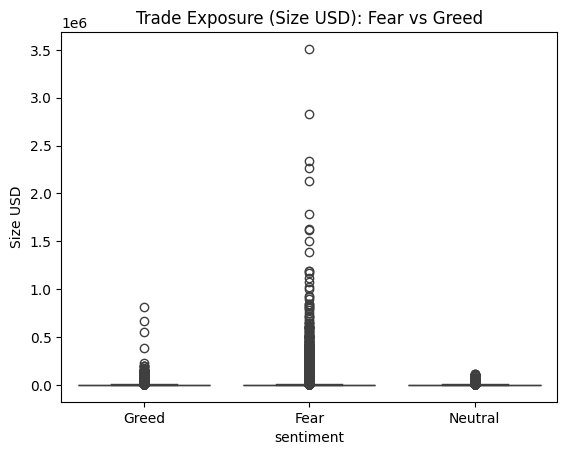

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=merged, x='sentiment', y='Size USD')
plt.title("Trade Exposure (Size USD): Fear vs Greed")
plt.show()


In [ ]:
long_short_daily = (
    merged.groupby(['date','Side'])
    .size()
    .unstack()
    .fillna(0)
)

long_short_daily['long_ratio'] = (
    long_short_daily['BUY'] /
    (long_short_daily['BUY'] + long_short_daily['SELL'])
)

long_short_daily = long_short_daily.reset_index()


In [ ]:
long_short_daily = long_short_daily.merge(
    merged[['date','sentiment']].drop_duplicates(),
    on='date',
    how='left'
)


In [ ]:
long_short_daily.groupby('sentiment')['long_ratio'].mean()


,long_ratio
sentiment,
Fear,0.493617
Greed,0.594406
Neutral,0.490828


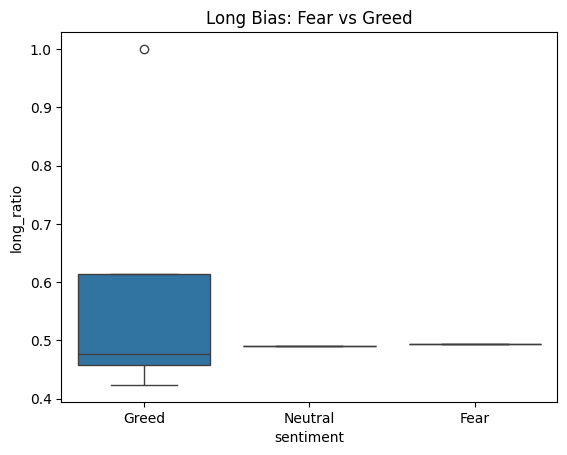

In [ ]:
sns.boxplot(data=long_short_daily, x='sentiment', y='long_ratio')
plt.title("Long Bias: Fear vs Greed")
plt.show()


In [ ]:
merged.groupby('sentiment')['Closed PnL'].describe()


,count,mean,std,min,25%,50%,75%,max
sentiment,,,,,,,,
Fear,133871.0,50.047622,909.121796,-35681.74723,0.0,0.0,6.042830,135329.09010
Greed,43251.0,77.838247,1059.262203,-117990.10410,0.0,0.0,10.825007,44223.45187
Neutral,7141.0,22.229713,633.704815,-18360.67007,0.0,0.0,1.950048,18282.19011


In [ ]:
merged.groupby('sentiment')['Closed PnL'].mean()


,Closed PnL
sentiment,
Fear,50.047622
Greed,77.838247
Neutral,22.229713


In [ ]:
from scipy.stats import f_oneway

fear_pnl = merged[merged['sentiment']=='Fear']['Closed PnL']
greed_pnl = merged[merged['sentiment']=='Greed']['Closed PnL']
neutral_pnl = merged[merged['sentiment']=='Neutral']['Closed PnL']

f_stat, p_value = f_oneway(fear_pnl, greed_pnl, neutral_pnl)

print("F-stat:", f_stat)
print("P-value:", p_value)


F-stat: 19.027829688169362
P-value: 5.459738036811819e-09


In [ ]:
from scipy.stats import ttest_ind

print("Greed vs Fear:")
print(ttest_ind(greed_pnl, fear_pnl, equal_var=False))

print("\nGreed vs Neutral:")
print(ttest_ind(greed_pnl, neutral_pnl, equal_var=False))

print("\nFear vs Neutral:")
print(ttest_ind(fear_pnl, neutral_pnl, equal_var=False))


Greed vs Fear:
TtestResult(statistic=np.float64(4.9038309651960725), pvalue=np.float64(9.421142077044365e-07), df=np.float64(65094.01447809891))

Greed vs Neutral:
TtestResult(statistic=np.float64(6.13426192323168), pvalue=np.float64(8.774354440833521e-10), df=np.float64(14729.53450614164))

Fear vs Neutral:
TtestResult(statistic=np.float64(3.5212558993116585), pvalue=np.float64(0.00043168563195185246), df=np.float64(8788.135654863408))


In [ ]:
merged.groupby('sentiment')['Closed PnL'].std()


,Closed PnL
sentiment,
Fear,909.121796
Greed,1059.262203
Neutral,633.704815


In [ ]:
merged.groupby('sentiment').size()


,0
sentiment,
Fear,133871
Greed,43251
Neutral,7141


In [ ]:
daily_metrics.groupby('sentiment')['num_trades'].mean()


,num_trades
sentiment,
Fear,4183.468750
Greed,1168.945946
Neutral,892.625000


In [ ]:
trader_exposure = merged.groupby('Account')['Size USD'].mean()

median_exposure = trader_exposure.median()

high_exposure = trader_exposure[trader_exposure > median_exposure].index
low_exposure = trader_exposure[trader_exposure <= median_exposure].index

daily_metrics['exposure_segment'] = daily_metrics['Account'].apply(
    lambda x: 'High Exposure' if x in high_exposure else 'Low Exposure'
)


In [ ]:
daily_metrics.groupby(['exposure_segment','sentiment'])['Closed PnL'].mean()


exposure_segment  sentiment
High Exposure     Fear         288048.763066
                  Greed         98227.708112
                  Neutral       12197.891754
Low Exposure      Fear         130696.561345
                  Greed         84835.549462
                  Neutral       24429.740563
Name: Closed PnL, dtype: float64

In [ ]:
trader_frequency = merged.groupby('Account').size()

median_freq = trader_frequency.median()

high_freq = trader_frequency[trader_frequency > median_freq].index
low_freq = trader_frequency[trader_frequency <= median_freq].index

daily_metrics['frequency_segment'] = daily_metrics['Account'].apply(
    lambda x: 'High Frequency' if x in high_freq else 'Low Frequency'
)

daily_metrics.groupby(['frequency_segment','sentiment'])['Closed PnL'].mean()


frequency_segment  sentiment
High Frequency     Fear         324428.018469
                   Greed        142172.856813
                   Neutral        6867.420164
Low Frequency      Fear          94317.305942
                   Greed         42498.452869
                   Neutral       32818.174355
Name: Closed PnL, dtype: float64

In [ ]:
trader_sharpe = daily_metrics.groupby('Account')['Closed PnL'].mean() / \
                daily_metrics.groupby('Account')['Closed PnL'].std()

median_sharpe = trader_sharpe.median()

consistent = trader_sharpe[trader_sharpe > median_sharpe].index

daily_metrics['consistency_segment'] = daily_metrics['Account'].apply(
    lambda x: 'Consistent' if x in consistent else 'Inconsistent'
)

daily_metrics.groupby(['consistency_segment','sentiment'])['Closed PnL'].mean()


consistency_segment  sentiment
Consistent           Fear         137003.653534
                     Greed        111643.692592
                     Neutral       45479.484590
Inconsistent         Fear         265659.668950
                     Greed         75251.568842
                     Neutral        4460.784862
Name: Closed PnL, dtype: float64

In [ ]:
daily_metrics.groupby('sentiment')['Closed PnL'].std()


,Closed PnL
sentiment,
Fear,380423.906864
Greed,264805.415699
Neutral,57227.787895


In [ ]:
daily_metrics = daily_metrics.sort_values(['Account','date'])

daily_metrics['next_day_pnl'] = daily_metrics.groupby('Account')['Closed PnL'].shift(-1)

# Bucketize into tertiles
daily_metrics['pnl_bucket'] = pd.qcut(
    daily_metrics['next_day_pnl'],
    q=3,
    labels=['Low','Medium','High']
)

In [ ]:
features = [
    'sentiment_encoded',      # Fear=0, Neutral=1, Greed=2
    'num_trades',
    'Size USD',
    'long_ratio',
    'Closed PnL'              # previous day pnl
]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Create sentiment_encoded column
sentiment_mapping = {'Fear': 0, 'Neutral': 1, 'Greed': 2}
daily_metrics['sentiment_encoded'] = daily_metrics['sentiment'].map(sentiment_mapping)

# Merge long_ratio into daily_metrics
daily_metrics = daily_metrics.merge(long_short_daily[['date', 'long_ratio']], on='date', how='left')

# Fill NaN values that might result from the merge if some dates in daily_metrics don't have a corresponding long_ratio
daily_metrics['long_ratio'] = daily_metrics['long_ratio'].fillna(daily_metrics['long_ratio'].mean())

# Update features list
features = [
    'sentiment_encoded',      # Fear=0, Neutral=1, Greed=2
    'num_trades',
    'avg_trade_size',         # Use avg_trade_size instead of Size USD
    'long_ratio',
    'Closed PnL'              # previous day pnl
]

# Drop rows with NaN values that might have been introduced by next_day_pnl or long_ratio
daily_metrics_cleaned = daily_metrics.dropna(subset=features + ['pnl_bucket'])

X = daily_metrics_cleaned[features]
y = daily_metrics_cleaned['pnl_bucket']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

preds = model.predict(X_test)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        High       0.29      0.67      0.40         3
         Low       0.00      0.00      0.00         6
      Medium       0.50      0.40      0.44         5

    accuracy                           0.29        14
   macro avg       0.26      0.36      0.28        14
weighted avg       0.24      0.29      0.24        14



In [ ]:
importances = pd.Series(model.feature_importances_, index=features)
print(importances.sort_values(ascending=False))


num_trades           0.329086
avg_trade_size       0.295641
Closed PnL           0.262402
long_ratio           0.083660
sentiment_encoded    0.029211
dtype: float64


In [ ]:
daily_metrics['high_profit'] = (
    daily_metrics['next_day_pnl'] > daily_metrics['next_day_pnl'].median()
).astype(int)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())


0.3555555555555555


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = LogisticRegression(max_iter=1000)

scores = cross_val_score(model, X, y, cv=5)
print(scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

0.31111111111111117


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000))
])

scores = cross_val_score(model, X, y, cv=5)

print("Cross-validated accuracy:", scores.mean())


Cross-validated accuracy: 0.3333333333333333


In [ ]:
daily_metrics['next_day_abs_pnl'] = (
    daily_metrics.groupby('Account')['Closed PnL'].shift(-1).abs()
)

daily_metrics['high_vol'] = (
    daily_metrics['next_day_abs_pnl'] >
    daily_metrics['next_day_abs_pnl'].median()
).astype(int)

# Align y_vol with the indices of X, which comes from daily_metrics_cleaned
y_vol = daily_metrics['high_vol'].loc[X.index]

scores = cross_val_score(model, X, y_vol, cv=5)
print("Volatility prediction accuracy:", scores.mean())

Volatility prediction accuracy: 0.4888888888888888


In [ ]:
# Trader-level aggregation
trader_features = daily_metrics.groupby('Account').agg({
    'num_trades': 'mean',
    'avg_trade_size': 'mean',   # use your correct column name
    'Closed PnL': 'mean'
})

# Add volatility (risk proxy)
trader_features['pnl_std'] = daily_metrics.groupby('Account')['Closed PnL'].std()

# Add directional bias
trader_features['long_ratio'] = daily_metrics.groupby('Account')['long_ratio'].mean()

trader_features = trader_features.dropna()

In [ ]:
trader_features.head()


,num_trades,avg_trade_size,Closed PnL,pnl_std,long_ratio
Account,,,,,
0x083384f897ee0f19899168e3b1bec365f52a9012,1909.0,15578.066879,800114.909989,1.594697e+06,0.458593
0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1926.5,2093.050795,18853.086574,2.481039e+03,0.458593
0x271b280974205ca63b716753467d5a371de622ab,382.0,16282.920323,10587.696144,1.681032e+04,0.469338
0x28736f43f1e871e6aa8b1148d38d4994275d72c4,6633.0,508.413964,66157.740843,7.880372e+04,0.458593
0x2c229d22b100a7beb69122eed721cee9b24011dd,1617.0,3073.413160,84313.992027,4.539380e+04,0.458593


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(trader_features)


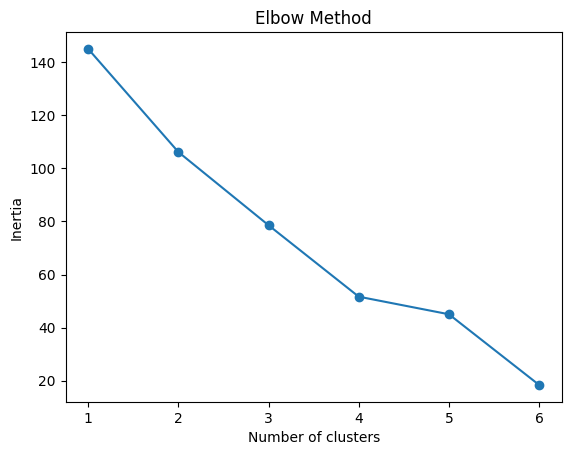

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(range(1,7), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
trader_features['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
cluster_summary = trader_features.groupby('cluster').mean()
print(cluster_summary)


          num_trades  avg_trade_size     Closed PnL       pnl_std  long_ratio
cluster                                                                      
0        2483.443182     2914.055036   76120.980713  8.029982e+04    0.465510
1        1794.625000    12038.265487  207659.095565  2.638691e+05    0.465097
2        1909.000000    15578.066879  800114.909989  1.594697e+06    0.458593


In [ ]:
cluster_sentiment = daily_metrics.merge(
    trader_features['cluster'],
    left_on='Account',
    right_index=True
)

cluster_sentiment.groupby(['cluster','sentiment'])['Closed PnL'].mean()


cluster  sentiment
0        Fear         8.508665e+04
         Greed        6.577198e+04
         Neutral      2.442974e+04
1        Fear         3.204760e+05
         Greed        2.131383e+05
         Neutral      1.219789e+04
2        Fear         1.927736e+06
         Greed       -3.275059e+05
Name: Closed PnL, dtype: float64